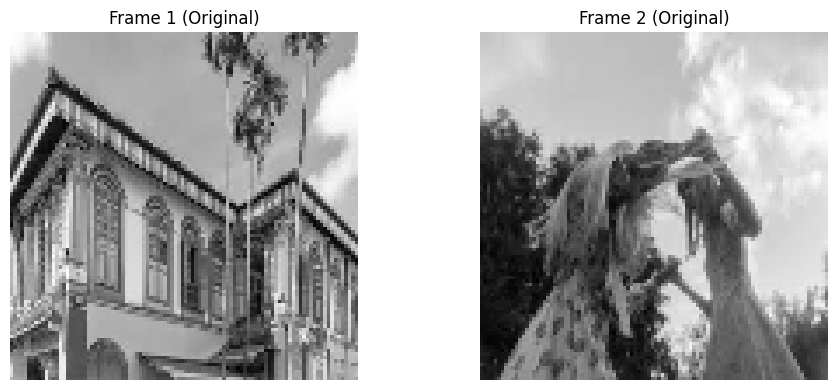

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale frames (example: from a video or file)
frame1 = cv2.imread('frame1.jpg', cv2.IMREAD_GRAYSCALE)
frame2 = cv2.imread('frame2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize for efficiency
frame1 = cv2.resize(frame1, (100, 100))
frame2 = cv2.resize(frame2, (100, 100))

# Normalize intensity to range [0,1]
frame1 = frame1.astype(float) / 255.0
frame2 = frame2.astype(float) / 255.0
# Display the two original frames side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(frame1, cmap='gray')
plt.title("Frame 1 (Original)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(frame2, cmap='gray')
plt.title("Frame 2 (Original)")
plt.axis('off')

plt.tight_layout()
plt.show()


Horn–Schunck Algorithm

In [14]:
def horn_schunck(I1, I2, alpha=15, num_iter=100):
    u = np.zeros_like(I1)
    v = np.zeros_like(I1)

    # Compute gradients
    Ix = cv2.Sobel(I1, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(I1, cv2.CV_64F, 0, 1, ksize=3)
    It = I2 - I1

    # Averaging kernel
    kernel = np.array([[1/12, 1/6, 1/12],
                       [1/6, 0, 1/6],
                       [1/12, 1/6, 1/12]])

    for _ in range(num_iter):
        u_avg = cv2.filter2D(u, -1, kernel)
        v_avg = cv2.filter2D(v, -1, kernel)

        num = (Ix * u_avg + Iy * v_avg + It)
        den = alpha**2 + Ix**2 + Iy**2

        u = u_avg - (Ix * num) / den
        v = v_avg - (Iy * num) / den

    return u, v
horn_schunck(frame1,frame2)

(array([[-0.00132405, -0.00135607, -0.0013564 , ..., -0.01141677,
         -0.0114303 , -0.01137461],
        [-0.00125498, -0.00129004, -0.00130435, ..., -0.01147532,
         -0.011553  , -0.01147583],
        [-0.00104133, -0.00108341, -0.00112884, ..., -0.01163638,
         -0.01185952, -0.01175236],
        ...,
        [-0.04245263, -0.04350667, -0.04086936, ...,  0.00550543,
          0.00536766,  0.00511799],
        [-0.04378383, -0.04460772, -0.04220337, ...,  0.00604839,
          0.00592778,  0.00566828],
        [-0.04414959, -0.04473945, -0.04261904, ...,  0.00624581,
          0.00604408,  0.00584321]]),
 array([[-0.00067043, -0.00064233, -0.00055711, ..., -0.00723382,
         -0.00696677, -0.00688654],
        [-0.0006564 , -0.00062591, -0.0005426 , ..., -0.00726515,
         -0.00703754, -0.00696714],
        [-0.00061954, -0.00057839, -0.00046778, ..., -0.00735667,
         -0.00714938, -0.00709019],
        ...,
        [ 0.01176988,  0.01153016,  0.01098556, ...,  

Visualize Optical Flow

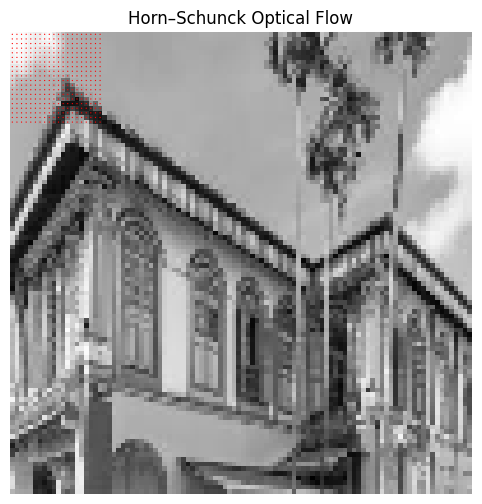

In [15]:
u, v = horn_schunck(frame1, frame2)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(frame1, cmap='gray')
plt.quiver(u[::5, ::5], -v[::5, ::5], color='red', angles='xy', scale_units='xy', scale=1)
plt.title("Horn–Schunck Optical Flow")
plt.axis('off')
plt.show()


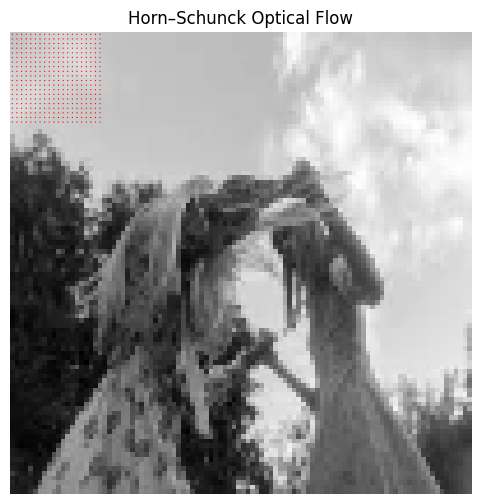

In [16]:
u, v = horn_schunck(frame1, frame2)

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(frame2, cmap='gray')
plt.quiver(u[::5, ::5], -v[::5, ::5], color='red', angles='xy', scale_units='xy', scale=1)
plt.title("Horn–Schunck Optical Flow")
plt.axis('off')
plt.show()


#Conclusion

In this experiment, we successfully implemented the classical Horn–Schunck optical flow algorithm to estimate the motion field between two consecutive grayscale video frames. The algorithm relies on the fundamental assumptions of brightness constancy and spatial smoothness to compute a dense optical flow field. Through preprocessing, derivative computation, and iterative refinement, the motion vectors were effectively estimated and visualized using quiver plots. The results demonstrated smooth and coherent flow fields in regions with gradual motion, validating the effectiveness of the Horn–Schunck method for small displacements. However, the method exhibited limitations in accurately capturing large motions due to its reliance on local gradient information. Overall, the experiment provided valuable insights into the working of global optical flow estimation techniques and laid the groundwork for exploring more advanced methods, such as the pyramidal Horn–Schunck approach, for handling complex motion scenarios.